# <center>Laboratorium <br>Metod Numerycznych <br> Aproksymacja</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev, BSpline
import main



Aproksymacja funkcji jest fundamentalnym zagadnieniem w analizie numerycznej, które polega na przybliżaniu funkcji bardziej skomplikowanej przez funkcję prostszą. Jest to szczególnie użyteczne w przypadkach, kiedy mamy do czynienia z funkcjami trudnymi do analizy lub gdy potrzebujemy szybkich obliczeń numerycznych.

**[Metoda Najmniejszych Kwadratów](https://en.wikipedia.org/wiki/Least_squares)**

Metoda najmniejszych kwadratów jest jedną z najczęściej stosowanych technik aproksymacji. Polega ona na minimalizacji sumy kwadratów różnic między wartościami obserwowanymi a wartościami przewidywanymi przez model aproksymacyjny. Matematycznie, jeśli mamy zbiór danych $(x_i, y_i)$, szukamy funkcji $f(x)$, która minimalizuje:
$
S = \sum_{i=1}^n \left(y_i - f(x_i)\right)^2
$

**[Funkcje Sklejane (Splines)](https://en.wikipedia.org/wiki/Spline_(mathematics))**

Funkcje sklejane, znane również jako splines, to kolejna popularna technika aproksymacji. Splines to ciągłe i gładkie funkcje, które są definiowane kawałkami przez wielomiany. W przeciwieństwie do globalnych metod aproksymacji, jak wielomiany wysokiego stopnia, splines unikają problemu oscylacji, oferując lepszą kontrolę nad kształtem krzywej aproksymacyjnej.

**[B-Splines](https://en.wikipedia.org/wiki/B-spline)**

B-Splines, czyli bazowe splines, stanowią rozszerzenie idei funkcji sklejanych. Są to specjalne rodzaje splines, które zapewniają dodatkową elastyczność i kontrolę nad kształtem krzywej. B-Splines są zdefiniowane jako liniowa kombinacja funkcji bazowych.

***Zadanie 1.***

Napisz skrypt w języku Python, który dokona aproksymacji liniowej funkcji sinus:

$$y = sin(x)$$

na przedziale od 0 do 2π używając metody najmniejszych kwadratów. Wygeneruj zbiór danych składający się z minimum 50 punktów z równymi odstępami w tym przedziale. Twoje zadanie polega na znalezieniu najlepiej dopasowanej linii prostej do tych danych.

Rozwiązanie powinno zawierać nasstępujące punkty:

1) Wygeneruj zbiór danych (x, y), gdzie y to wartości sin(x).
2) Napisz funkcję wykonującą aproksymację liniową metodą najmniejszych kwadratów (funkcja *linear_least_squares* z main.py).
3) Wyświetl oryginalne dane i dopasowaną linię na wykresie.

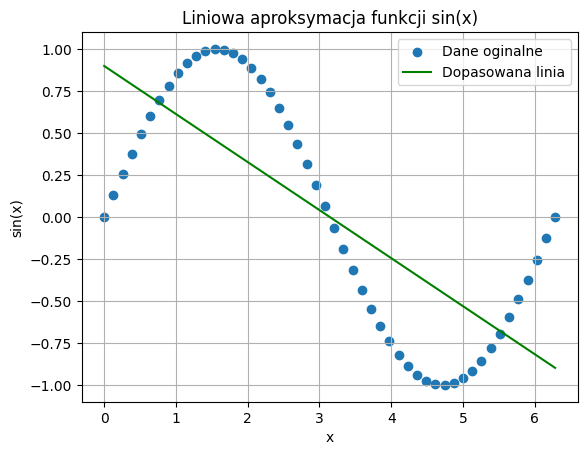

In [2]:
x = np.linspace(0, 2*np.pi, 50)

y = np.sin(x)

res = main.linear_least_squares(x, y)
l = x*res[0] + res[1]


plt.scatter(x, y, label="Dane oginalne")
plt.plot(x, l, "g", label="Dopasowana linia")
plt.title("Liniowa aproksymacja funkcji sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid()
plt.show()

***Zadanie 2.***

Napisz skrypt w języku Python, który dokona aproksymacji wielmianowej stopnia pierwszego oraz trzeciego funkcji z poprzedniego zadania równiez na przedziale od 0 do 2π, używając metody najmniejszych kwadratów. 
Wygeneruj zbiór danych składający się z minimum 50 punktów z równymi odstępami w tym przedziale.
Do wykonania obu aproksymacji uzyj funkcji *np.polyfit*. oraz *np.poly1d*.
Zobrazuj obie aproksymacji w zestawieniu z oryginalną funkcją na jednym wykresie.


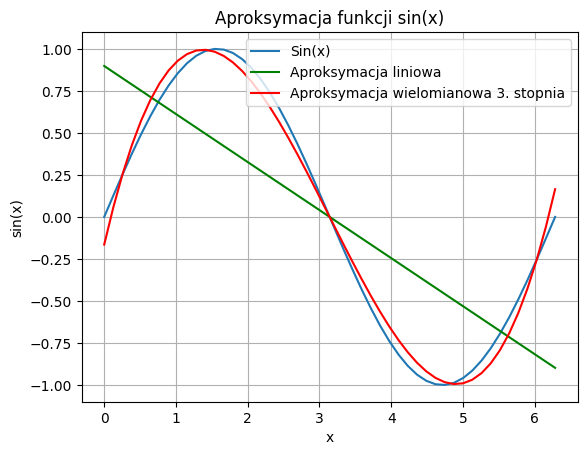

In [3]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

ps = np.polyfit(x, y, 1)
apr_ps = np.poly1d(ps)

ts = np.polyfit(x, y, 3)
apr_ts = np.poly1d(ts)


plt.plot(x, y, label="Sin(x)")
plt.plot(x, apr_ps(x), "g", label="Aproksymacja liniowa")
plt.plot(x, apr_ts(x), "r", label="Aproksymacja wielomianowa 3. stopnia")
plt.title("Aproksymacja funkcji sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid()
plt.show()



***Zadanie 3.***

Napisz skrypt w języku Python, który dokona aproksymacji funckjami sklejanymi stopnia trzeciego funkcji na przedziale $[-1;1]$:

$$f(x) = \frac{1}{1 + 25x^2}$$

Wygeneruj dwa warianty danych dla funkcji:
Pierwszy zestaw z 15 równomiernie rozłożonymi punktami.
Drugi zestaw z 15 punktami węzłów Czebyszewa (za pomoca funkcji *cheb_roots* z pliku main.py).

Następnie dokonaj aproksymacji tych danych przy użyciu funkcji sklejanych (splajnów) trzeciego stopnia dla obu zestawów punktów.
Wyświetl na wykresie zarówno wygenerowane dane, krzywe aproksymacji dla obu zestawów punktów, jak i oryginalny przebieg funkcji.
Wykorzystaj funkcje scipy.interpolate.splrep i scipy.interpolate.splev z biblioteki SciPy do stworzenia i ewaluacji splajnów.
Do wizualizacji wyników użyj matplotlib.

Porównaj jakość dopasowania dla obu przypadków i zwróć uwagę na efekt Rungego. 
*Czy wykorzystanie węzłów Czebysheva jest dobrym rozwiązaniem eliminacji problem efektu Rungego w tym przypadku? Uzasadnij odpowiedź.*



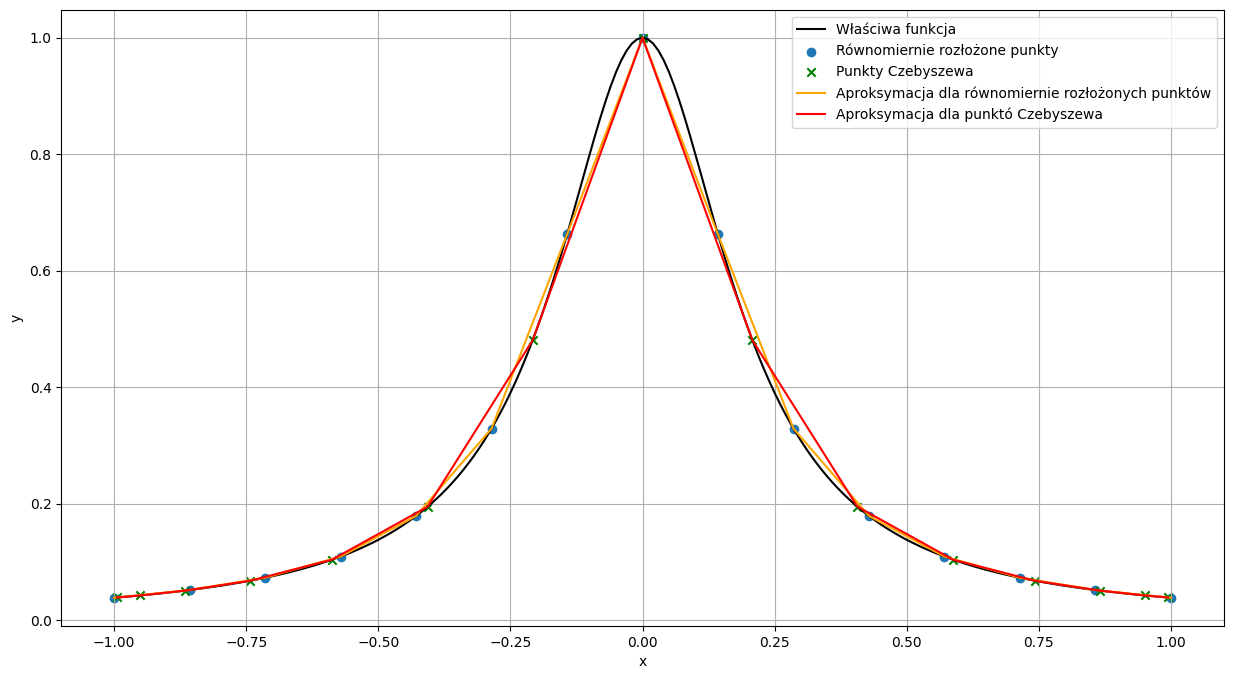

In [41]:
f = lambda x: 1 / (1 + 25 * (x**2))

x1 = np.linspace(-1, 1, 15)
t = np.arange(-1, 1, 0.01)
cheb_nodes = main.chebyshev_nodes(15, (-1, 1))

f_t = f(t)
f_x1 = f(x1)
f_cheb_nodes = f(cheb_nodes)

spl_x1 = splrep(x1, f_x1, k=3)
y_spl_x1 = splev(x1, spl_x1)
spl_cheb_nodes = splrep(cheb_nodes, f_cheb_nodes, k=3)
y_spl_cheb_nodes = splev(cheb_nodes, spl_cheb_nodes)


plt.figure(figsize=(15, 8))
plt.plot(t, f_t, "k", label="Właściwa funkcja")
plt.scatter(x1, f_x1, label="Równomiernie rozłożone punkty")
plt.scatter(cheb_nodes, f_cheb_nodes, label="Punkty Czebyszewa", c="g", marker="x")
plt.plot(x1, y_spl_x1, label="Aproksymacja dla równomiernie rozłożonych punktów", c="orange")
plt.plot(cheb_nodes, y_spl_cheb_nodes, label="Aproksymacja dla punktó Czebyszewa", c="red")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend(loc="upper right")
plt.show()

# Odpowiedź
# Tu podczas wykorzystania węzłów czebysheva występuje efekt Rungego

***Zadanie 4.***

Napisz skrypt w języku Python, który dokona aproksymacji funckjami Bspline na przedziale $[-5;5]$:

$$y = \sin(x) + 0.1x^2$$

używając 20 równomiernie rozłożonych punktów jako danych.Użyj B-splajnów do aproksymacji tych danych. Zastosuj B-splajny trzeciego stopnia. Porównaj krzywą aproksymacji z oryginalnymi danymi na wykresie. Podaj krótką analizę jakości dopasowania B-splajnów do danych.

Do utworzenia tej aproksymacji przydatne będą funkcje: *scipy.interpolate.splrep* oraz *scipy.interpolate.BSpline*




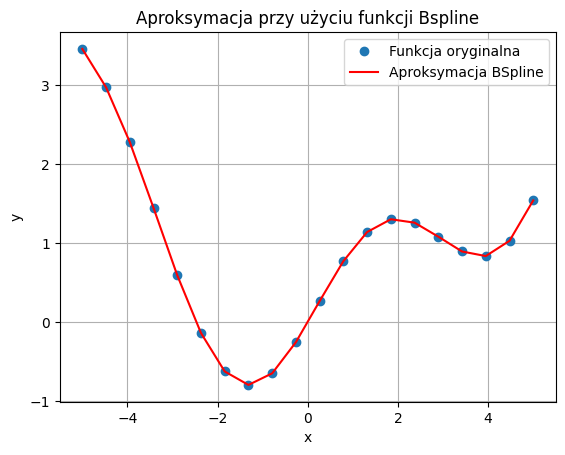

In [45]:
x = np.linspace(-5, 5, 20)
f = lambda x: np.sin(x) + 0.1 * x**2
y = f(x)

t, c, k = splrep(x, y, s=0, k=3)
y_bspline = BSpline(t, c, k)

plt.plot(x, y, 'o', label="Funkcja oryginalna")
plt.plot(x, y_bspline(x), 'r', label="Aproksymacja BSpline")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproksymacja przy użyciu funkcji Bspline")
plt.grid()
plt.show()


Na ogólną jakoś dopasowania Dsplajnów nie można narzekać. Krzywa aproksymacji dobrze odwzorowuje kształt oryginalnych danych a B-splajny skutecznie "łapią" zakrzywienia i ogólne tendencje danych.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)